In [764]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import models, optimizers, regularizers
from keras.layers import Dense
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [765]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
gs = pd.read_csv("../data/gender_submission.csv")

In [766]:
print(train.shape)
print(test.shape)
print(gs.shape)

(891, 12)
(418, 11)
(418, 2)


In [767]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [768]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [769]:
train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [770]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [771]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


Fill NA

In [772]:
# Train
train["Embarked"].fillna(value = "S", inplace = True)
train["Age"].fillna(value = train["Age"].mean(), inplace = True)
# Test
test["Age"].fillna(value = test["Age"].mean(), inplace = True)
test["Fare"].fillna(value = test["Fare"].mean(), inplace = True)

In [773]:
encoder = LabelEncoder()
train["Sex"] = encoder.fit_transform(train["Sex"])
train["Embarked"] = encoder.fit_transform(train["Embarked"])
test["Sex"] = encoder.fit_transform(test["Sex"])
test["Embarked"] = encoder.fit_transform(test["Embarked"])

train = train.astype("float32")
test = test.astype("float32")

In [774]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.250000,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.283302,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.925000,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.099998,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.050000,2.0


In [775]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,34.5,0.0,0.0,7.8292,1.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,2.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,1.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,2.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,2.0


In [776]:
X_train = train.drop(["Survived"], axis = 1)
y_train = train["Survived"]

X_test = test
y_test = gs["Survived"]

In [777]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float32
 1   Sex       891 non-null    float32
 2   Age       891 non-null    float32
 3   SibSp     891 non-null    float32
 4   Parch     891 non-null    float32
 5   Fare      891 non-null    float32
 6   Embarked  891 non-null    float32
dtypes: float32(7)
memory usage: 24.5 KB


In [778]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float32
 1   Sex       418 non-null    float32
 2   Age       418 non-null    float32
 3   SibSp     418 non-null    float32
 4   Parch     418 non-null    float32
 5   Fare      418 non-null    float32
 6   Embarked  418 non-null    float32
dtypes: float32(7)
memory usage: 11.6 KB


In [779]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [780]:
X_train.shape

(891, 7)

In [781]:
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [782]:
model = models.Sequential()
model.add(Dense(32, activation = "relu", input_shape = (7,), kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(32, activation = "relu", kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), loss = "binary_crossentropy", metrics = "accuracy")

In [783]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 32)                256       
                                                                 
 dense_205 (Dense)           (None, 32)                1056      
                                                                 
 dense_206 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [784]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 30, validation_data = (x_val, y_val))

Epoch 1/200
27/27 [==============================] - 1s 7ms/step - loss: 0.6983 - accuracy: 0.6330 - val_loss: 0.6936 - val_accuracy: 0.6111
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6679 - val_loss: 0.6740 - val_accuracy: 0.6222
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6816 - val_loss: 0.6621 - val_accuracy: 0.6333
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6365 - accuracy: 0.6841 - val_loss: 0.6545 - val_accuracy: 0.6111
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6929 - val_loss: 0.6564 - val_accuracy: 0.6222
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.6879 - val_loss: 0.6453 - val_accuracy: 0.6444
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6891 - val_loss: 0.6426 - val_accuracy: 0.6556
Epoch 8/200
2

In [785]:
train_acc = model.evaluate(X_train, y_train, batch_size=30)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=30)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

14/14 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8708
Training accuracy: 0.8052434325218201
Testing accuracy: 0.8708133697509766


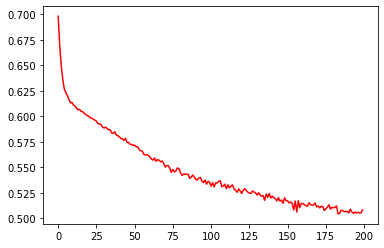

In [786]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()